# **Laboratorio:** Modelado de regresión para estimar el precio de jugadores de fútbol  

**Estudiantes:**  
- Estudiante 1: Juan Manuel Rodriguez Diaz - 202013372  
- Estudiante 2: Daniela Echavarria Yepes - 202111348  



# Introducción y Objetivo

En este laboratorio se construirá un modelo de regresión para estimar el precio de mercado de jugadores de fútbol 
basado en diversas métricas de rendimiento y características. 

El objetivo es:

- Explorar y entender los datos entregados.  
- Preparar los datos mediante limpieza y preprocesamiento.  
- Construir y entrenar un modelo de regresión.  
- Evaluar cuantitativa y cualitativamente el modelo.  
- Exportar el mejor modelo para su uso en producción.  


## Importación de librerías
Para el análisis de datos utilizamos las librerías **pandas**, **numpy**, **matplotlib**, **seaborn** y **sklearn**.  
Estas herramientas permiten la manipulación de datos, visualización de variables y limpieza eficiente del dataset.



In [2]:
# ====================================
# 1. Importación de librerías
# ====================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# Configuración
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")


# Carga de datos
Se cargó el archivo `datos_entrenamiento_laboratorio1(train_data).csv` y se exploraron las primeras filas.  
El dataset contiene información de múltiples variables, incluyendo variables numéricas y categóricas.

In [3]:
# ====================================
# 2. Carga de datos
# ====================================
df = pd.read_csv("datos_entrenamiento_laboratorio1(train_data).csv")
print(f"Filas y columnas: {df.shape}")
display(df.head())


Filas y columnas: (57934, 50)


Jugador Nacionalidad Posicion    Edad             Dia_partido  \
0     Bruno Fernandes       pt POR    FW,AM  29-343  Friday August 16, 2024   
1     Marcus Rashford      eng ENG       LW  26-290  Friday August 16, 2024   
2         Amad Diallo       ci CIV       RW  22-036  Friday August 16, 2024   
3         Amad Diallo       ci CIV       RW  22-036  Friday August 16, 2024   
4  Alejandro Garnacho       ar ARG       RW  20-046  Friday August 16, 2024   

   Goles  Tiros Totales   xG  npxG  xAG  xAG.1  Acciones_que_crean_tiros  \
0      0              6  1.2   1.2  0.0    0.0                         2   
1      0              0  0.0   0.0  0.7    0.7                         1   
2      0              0  0.0   0.0  0.1    0.1                         1   
3     -5              0  0.0   0.0  0.1    0.1                         1   
4      0              2  0.7   0.7  0.2    0.2                         3   

   Pases_intentados  Pases_intentados.1  Pases_intentados.2  \
0                60                  60                  60   
1                30                  30                  30   
2                33                  33                  33   
3                33                  33                  33   
4                11                  11                  11   

   Pases_progresivos  Pases_progresivos.1  Regates_exitosos  \
0                  6                    6                 1   
1                  2                    2                 0   
2                  1                    1                 1   
3                  1                    1                 1   
4                  0                    0                 0   

   Regates_exitosos.1  Pases_medios_completados  Pases_largos_completados  \
0                   1                        14                         4   
1                   0                         2                         1   
2                   1                         6                         1   
3                   1                         6                         1   
4                   0                         3                         0   

   xAG.2  xAG.3   xA  Pases_en_ultimo_tercio  Pases_balon_vivo  \
0    0.0    0.0  0.0                       4                51   
1    0.7    0.7  0.1                       2                30   
2    0.1    0.1  0.1                       1                28   
3    0.1    0.1  0.1                       1                28   
4    0.2    0.2  0.1                       0                11   

   Pases_balon_muerto  Pases_al_hueco  Pases_centros  Pases_completados  \
0                   8               0              8                 43   
1                   0               0              1                 22   
2                   4               0              2                 28   
3                   4               0              2                 28   
4                   0               0              1                 10   

   Pases_completados.1  Pases_completados.2  Pases_fuera_de_juego  \
0                   43                   43                     1   
1                   22                   22                     0   
2                   28                   28                     1   
3                   28                   28                     1   
4                   10                   10                     0   

   Valla_no_vencida  Errores_defnsivos_ocasion_tiro  Toques_en_zona_ofensiva  \
0                 0                               0                       36   
1                 1                               0                       26   
2                 0                               0                       22   
3                 0                               0                       22   
4                 1                               0                       10   

   Toques_en_area_rival  %_de_regates_exitosos  Veces_que_fue_barrido_regate  \
0                     3              

## 1. Entendimiento de los datos

En esta etapa se:
- Consultó la estructura de los datos (`info()`).
- Se generaron estadísticas descriptivas (`describe()`).
- Se identificaron valores nulos y filas duplicadas.
  
Esto permitió entender la distribución de los datos y las columnas que requieren tratamiento.

In [ ]:

print("\n=== Información general ===")
print(df.info())

print("\n=== Estadísticas ===")
display(df.describe())



=== Información general ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57934 entries, 0 to 57933
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Jugador                         57934 non-null  object 
 1   Nacionalidad                    57902 non-null  object 
 2   Posicion                        57934 non-null  object 
 3   Edad                            57886 non-null  object 
 4   Dia_partido                     57934 non-null  object 
 5   Goles                           57934 non-null  int64  
 6   Tiros Totales                   57934 non-null  int64  
 7   xG                              57934 non-null  float64
 8   npxG                            57934 non-null  float64
 9   xAG                             57934 non-null  float64
 10  xAG.1                           57934 non-null  float64
 11  Acciones_que_crean_tiros        57934 non-null  int64  
 12  Pas

Goles  Tiros Totales            xG          npxG           xAG  \
count  57934.000000   57934.000000  57934.000000  57934.000000  57934.000000   
mean       0.513015       0.792402      0.088635      0.080473      0.062784   
std       16.440600       1.158538      0.209810      0.186549      0.152033   
min       -5.000000       0.000000      0.000000      0.000000      0.000000   
25%        0.000000       0.000000      0.000000      0.000000      0.000000   
50%        0.000000       0.000000      0.000000      0.000000      0.000000   
75%        0.000000       1.000000      0.100000      0.100000      0.100000   
max      995.000000      12.000000      2.900000      2.900000      2.100000   

              xAG.1  Acciones_que_crean_tiros  Pases_intentados  \
count  57934.000000              57934.000000      57934.000000   
mean       0.062784                  1.416750         31.659716   
std        0.152033                  1.727395         22.963272   
min        0.000000                  0.000000          0.000000   
25%        0.000000                  0.000000         13.000000   
50%        0.000000                  1.000000         28.000000   
75%        0.100000                  2.000000         45.000000   
max        2.100000                 16.000000        171.000000   

       Pases_intentados.1  Pases_intentados.2  Pases_progresivos  \
count        57934.000000        57934.000000       57934.000000   
mean            31.659716           31.659716           2.416232   
std             22.963272           22.963272           2.756341   
min              0.000000            0.000000           0.000000   
25%             13.000000           13.000000           0.000000   
50%             28.000000           28.000000           2.000000   
75%             45.000000           45.000000           4.000000   
max            171.000000          171.000000          30.000000   

       Pases_progresivos.1  Regates_exitosos  Regates_exitosos.1  \
count         57934.000000      57934.000000        57934.000000   
mean              2.416232          0.487451            0.487451   
std               2.756341          0.897683            0.897683   
min               0.000000          0.000000            0.000000   
25%               0.000000          0.000000            0.000000   
50%               2.000000          0.000000            0.000000   
75%               4.000000          1.000000            1.000000   
max              30.000000         15.000000           15.000000   

       Pases_medios_completados  Pases_largos_completados         xAG.2  \
count              57934.000000              57934.000000  57934.000000   
mean                  11.226309                  2.341941      0.062784   
std                   10.984869                  2.867533      0.152033   
min                    0.000000                  0.000000      0.000000   
25%                    3.000000                  0.000000      0.000000   
50%                    8.000000                  1.000000      0.000000   
75%                   16.000000                  3.000000      0.100000   
max                   95.000000                 24.000000      2.100000   

              xAG.3            xA  Pases_en_ultimo_tercio  Pases_balon_vivo  \
count  57934.000000  57934.000000            57934.000000      57934.000000   
mean       0.062784      0.055056                1.976232         28.593900   
std        0.152033      0.122355                2.583320         21.511297   
min        0.000000      0.000000                0.000000          0.000000   
25%        0.000000      0.000000                0.000000         12.000000   
50%        0.000000      0.000000                1.000000         24.000000   
75%        0.100000      0.100000                3.000000         40.000000   
max        2.100000      1.400000               37.000000        170.000000   

       Pases_balon_muerto  Pases_al_hueco  Pases_centros  Pases_completados


=== Valores nulos por columna ===
Jugador                               0
Nacionalidad                         32
Posicion                              0
Edad                                 48
Dia_partido                           0
Goles                                 0
Tiros Totales                         0
xG                                    0
npxG                                  0
xAG                                   0
xAG.1                                 0
Acciones_que_crean_tiros              0
Pases_intentados                      0
Pases_intentados.1                    0
Pases_intentados.2                    0
Pases_progresivos                     0
Pases_progresivos.1                   0
Regates_exitosos                      0
Regates_exitosos.1                    0
Pases_medios_completados              0
Pases_largos_completados              0
xAG.2                                 0
xAG.3                                 0
xA                                    0
Pases

In [6]:
# Mostramos las primeras filas del dataset
print("Primeras 5 filas del dataset:")
display(df.head())

Primeras 5 filas del dataset:


Jugador Nacionalidad Posicion    Edad             Dia_partido  \
0     Bruno Fernandes       pt POR    FW,AM  29-343  Friday August 16, 2024   
1     Marcus Rashford      eng ENG       LW  26-290  Friday August 16, 2024   
2         Amad Diallo       ci CIV       RW  22-036  Friday August 16, 2024   
3         Amad Diallo       ci CIV       RW  22-036  Friday August 16, 2024   
4  Alejandro Garnacho       ar ARG       RW  20-046  Friday August 16, 2024   

   Goles  Tiros Totales   xG  npxG  xAG  xAG.1  Acciones_que_crean_tiros  \
0      0              6  1.2   1.2  0.0    0.0                         2   
1      0              0  0.0   0.0  0.7    0.7                         1   
2      0              0  0.0   0.0  0.1    0.1                         1   
3     -5              0  0.0   0.0  0.1    0.1                         1   
4      0              2  0.7   0.7  0.2    0.2                         3   

   Pases_intentados  Pases_intentados.1  Pases_intentados.2  \
0                60                  60                  60   
1                30                  30                  30   
2                33                  33                  33   
3                33                  33                  33   
4                11                  11                  11   

   Pases_progresivos  Pases_progresivos.1  Regates_exitosos  \
0                  6                    6                 1   
1                  2                    2                 0   
2                  1                    1                 1   
3                  1                    1                 1   
4                  0                    0                 0   

   Regates_exitosos.1  Pases_medios_completados  Pases_largos_completados  \
0                   1                        14                         4   
1                   0                         2                         1   
2                   1                         6                         1   
3                   1                         6                         1   
4                   0                         3                         0   

   xAG.2  xAG.3   xA  Pases_en_ultimo_tercio  Pases_balon_vivo  \
0    0.0    0.0  0.0                       4                51   
1    0.7    0.7  0.1                       2                30   
2    0.1    0.1  0.1                       1                28   
3    0.1    0.1  0.1                       1                28   
4    0.2    0.2  0.1                       0                11   

   Pases_balon_muerto  Pases_al_hueco  Pases_centros  Pases_completados  \
0                   8               0              8                 43   
1                   0               0              1                 22   
2                   4               0              2                 28   
3                   4               0              2                 28   
4                   0               0              1                 10   

   Pases_completados.1  Pases_completados.2  Pases_fuera_de_juego  \
0                   43                   43                     1   
1                   22                   22                     0   
2                   28                   28                     1   
3                   28                   28                     1   
4                   10                   10                     0   

   Valla_no_vencida  Errores_defnsivos_ocasion_tiro  Toques_en_zona_ofensiva  \
0                 0                               0                       36   
1                 1                               0                       26   
2                 0                               0                       22   
3                 0                               0                       22   
4                 1                               0                       10   

   Toques_en_area_rival  %_de_regates_exitosos  Veces_que_fue_barrido_regate  \
0                     3              

In [7]:

# Identificación de columnas

num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()

print("\nVariables numéricas:", num_cols)
print("Variables categóricas:", cat_cols)



Variables numéricas: ['Goles', 'Tiros Totales', 'xG', 'npxG', 'xAG', 'xAG.1', 'Acciones_que_crean_tiros', 'Pases_intentados', 'Pases_intentados.1', 'Pases_intentados.2', 'Pases_progresivos', 'Pases_progresivos.1', 'Regates_exitosos', 'Regates_exitosos.1', 'Pases_medios_completados', 'Pases_largos_completados', 'xAG.2', 'xAG.3', 'xA', 'Pases_en_ultimo_tercio', 'Pases_balon_vivo', 'Pases_balon_muerto', 'Pases_al_hueco', 'Pases_centros', 'Pases_completados', 'Pases_completados.1', 'Pases_completados.2', 'Pases_fuera_de_juego', 'Valla_no_vencida', 'Errores_defnsivos_ocasion_tiro', 'Toques_en_zona_ofensiva', 'Toques_en_area_rival', '%_de_regates_exitosos', 'Veces_que_fue_barrido_regate', 'Acarreos_ultimo_tercio', 'Malos_controles', 'Perdida_balon', 'Pases_recibidos', 'Pases_progresivos_recibidos', 'Faltas_cometidas', 'Centros', 'Duelos_aereos_ganados', '%_de_duelos_aereos_ganados']
Variables categóricas: ['Jugador', 'Nacionalidad', 'Posicion', 'Edad', 'Dia_partido', 'market_value', 'contra

In [8]:
# Tipos de datos de cada atributo
print("Tipos de datos de los atributos:")
print(df.dtypes)

Tipos de datos de los atributos:
Jugador                            object
Nacionalidad                       object
Posicion                           object
Edad                               object
Dia_partido                        object
Goles                               int64
Tiros Totales                       int64
xG                                float64
npxG                              float64
xAG                               float64
xAG.1                             float64
Acciones_que_crean_tiros            int64
Pases_intentados                    int64
Pases_intentados.1                  int64
Pases_intentados.2                  int64
Pases_progresivos                   int64
Pases_progresivos.1                 int64
Regates_exitosos                    int64
Regates_exitosos.1                  int64
Pases_medios_completados            int64
Pases_largos_completados            int64
xAG.2                             float64
xAG.3                             float64
x

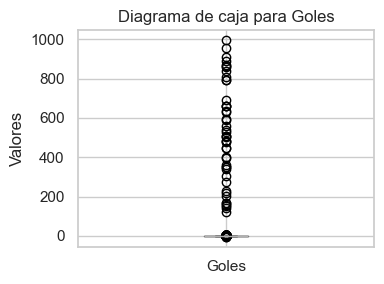

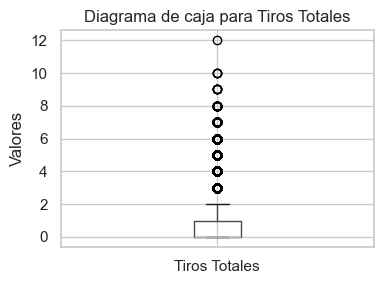

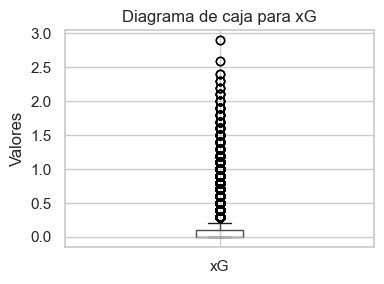

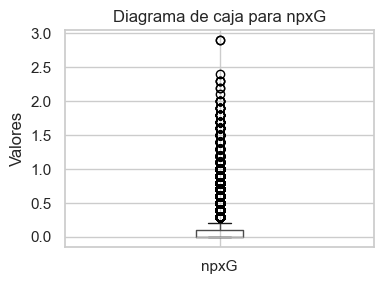

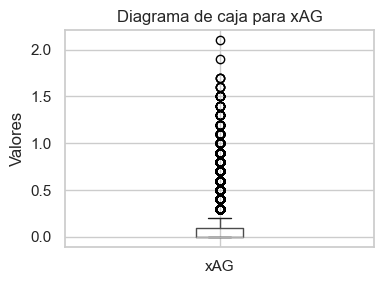

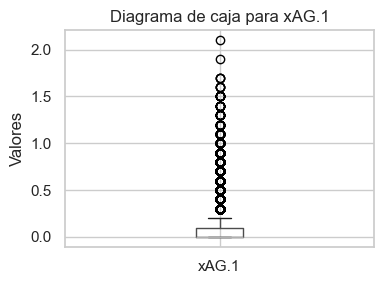

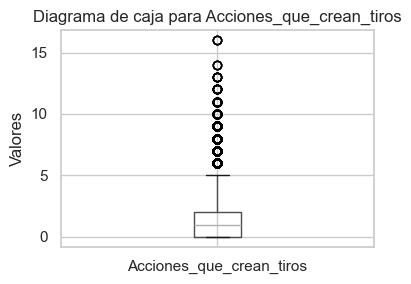

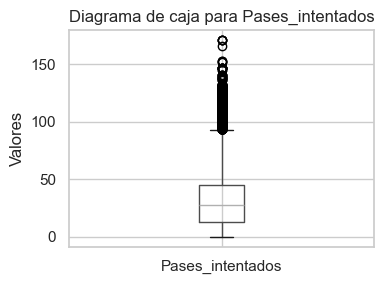

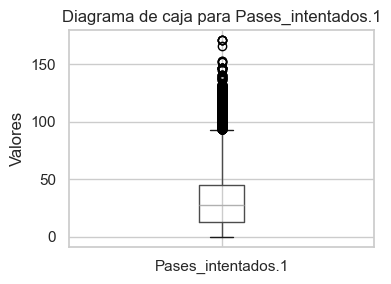

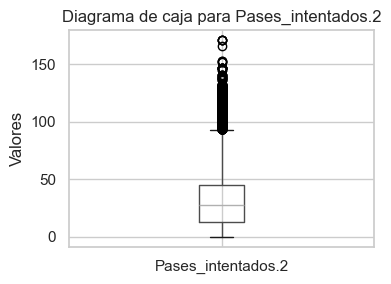

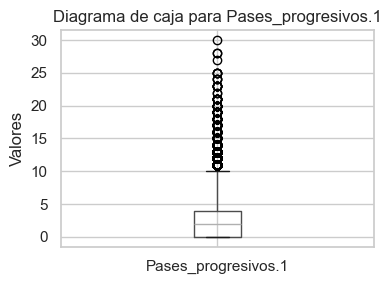

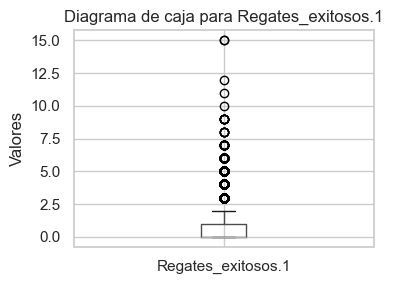

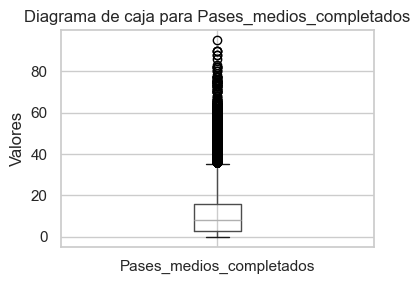

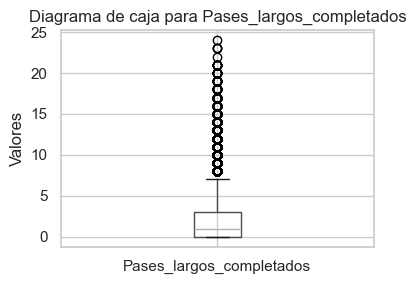

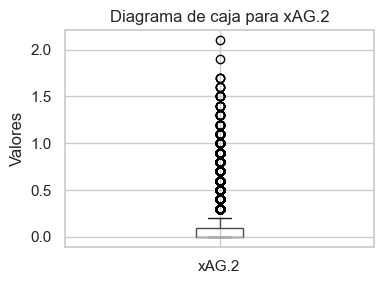

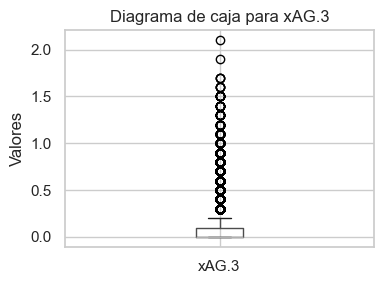

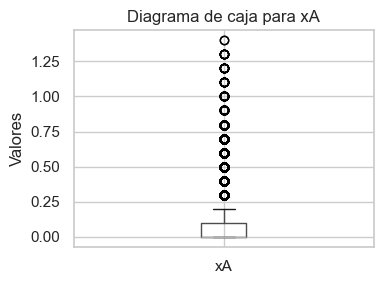

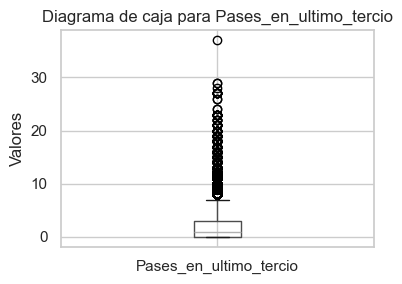

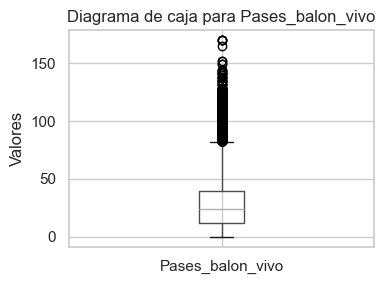

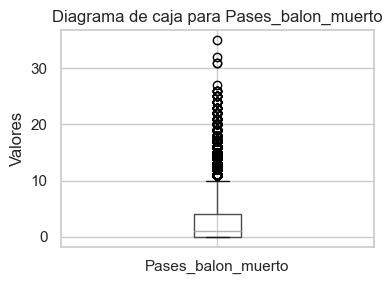

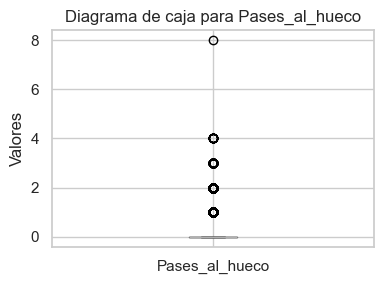

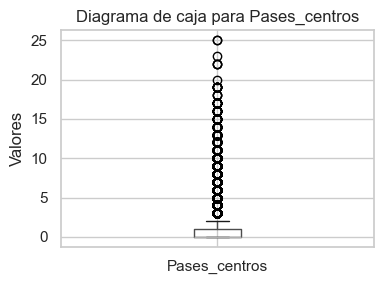

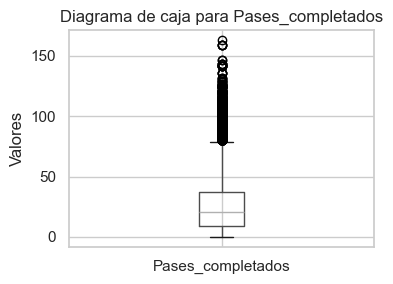

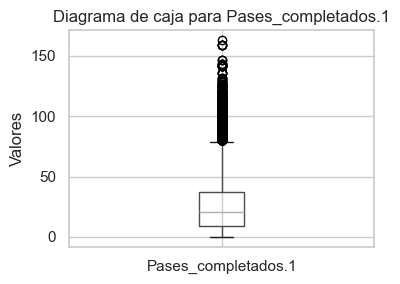

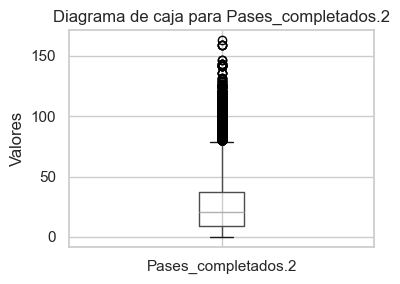

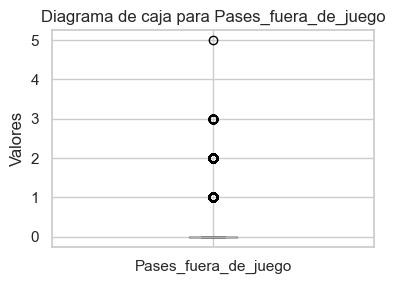

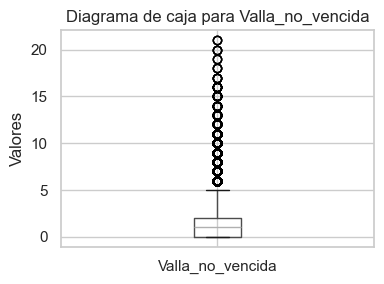

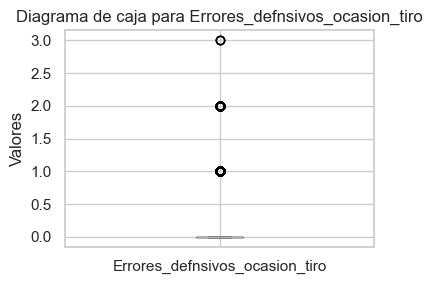

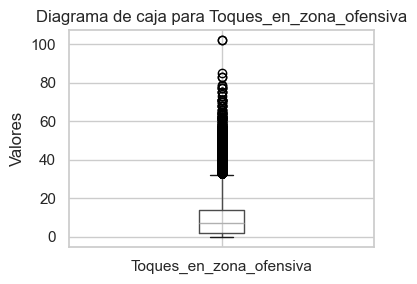

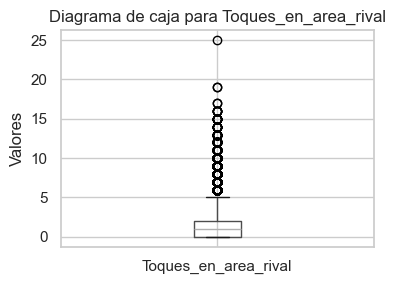

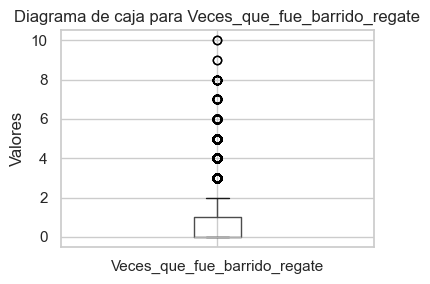

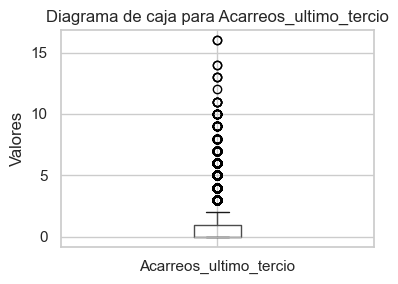

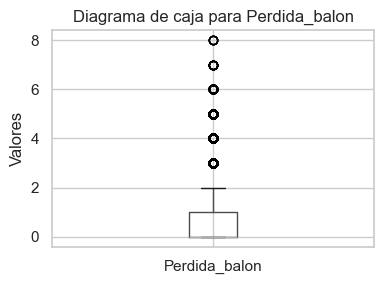

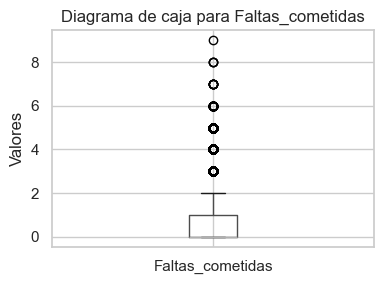

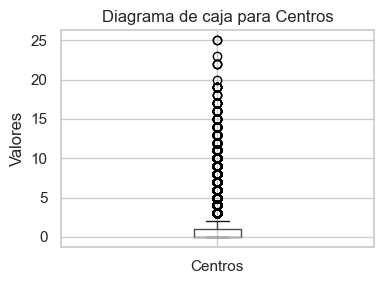

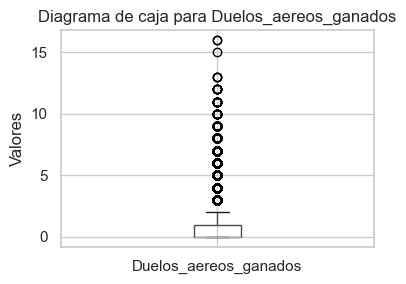

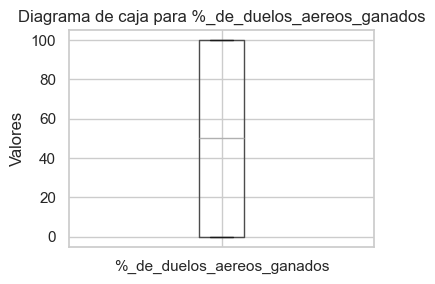

In [15]:
# Diagramas de caja para atributos numéricos

for col in num_cols:
    plt.figure(figsize=(4, 3))  # Más pequeño que (12, 8)
    df[[col]].boxplot()
    plt.title(f'Diagrama de caja para {col}')
    plt.ylabel('Valores')
    plt.xticks()
    plt.tight_layout()
    plt.show()

Se puede observar un gran cantidad de outliers en:

- Los centros (Pases_centros y Centros) son las variables con más valores atípicos.

- Errores técnicos como Malos_controles también tienen muchísimos outliers.

- Las métricas de goles esperados (xG y npxG) muestran que la mayoría de jugadores generan pocas ocasiones de gol.

- Los pases fuera de juego y los duelos aéreos ganados siguen el mismo patrón.

- Los tiros totales y los goles son altamente asimétricos, la gran mayoría de jugadores tiene valores bajos o nulos, mientras que los grandes goleadores generan cifras muy altas que aparecen como outliers.

- Las asistencias esperadas (xAG en sus diferentes variantes).

In [16]:
print("Conteo de valores únicos por columna:")
print(df.nunique())

Conteo de valores únicos por columna:
Jugador                           2242
Nacionalidad                       110
Posicion                           452
Edad                              7114
Dia_partido                        198
Goles                               51
Tiros Totales                       12
xG                                  27
npxG                                26
xAG                                 20
xAG.1                               20
Acciones_que_crean_tiros            16
Pases_intentados                   146
Pases_intentados.1                 146
Pases_intentados.2                 146
Pases_progresivos                   29
Pases_progresivos.1                 29
Regates_exitosos                    14
Regates_exitosos.1                  14
Pases_medios_completados            86
Pases_largos_completados            25
xAG.2                               20
xAG.3                               20
xA                                  15
Pases_en_ultimo_tercio    

In [17]:
print("Moda de cada columna:")
print(df.mode().iloc[0])

Moda de cada columna:
Jugador                                         Vitinha
Nacionalidad                                     fr FRA
Posicion                                             CB
Edad                                             24-231
Dia_partido                       Saturday May 10, 2025
Goles                                                 0
Tiros Totales                                         0
xG                                                  0.0
npxG                                                0.0
xAG                                                 0.0
xAG.1                                               0.0
Acciones_que_crean_tiros                              0
Pases_intentados                                      4
Pases_intentados.1                                    4
Pases_intentados.2                                    4
Pases_progresivos                                     0
Pases_progresivos.1                                   0
Regates_exitosos          

In [18]:
print("Mediana de columnas numéricas:")
print(df[num_cols].median())

Mediana de columnas numéricas:
Goles                              0.0
Tiros Totales                      0.0
xG                                 0.0
npxG                               0.0
xAG                                0.0
xAG.1                              0.0
Acciones_que_crean_tiros           1.0
Pases_intentados                  28.0
Pases_intentados.1                28.0
Pases_intentados.2                28.0
Pases_progresivos                  2.0
Pases_progresivos.1                2.0
Regates_exitosos                   0.0
Regates_exitosos.1                 0.0
Pases_medios_completados           8.0
Pases_largos_completados           1.0
xAG.2                              0.0
xAG.3                              0.0
xA                                 0.0
Pases_en_ultimo_tercio             1.0
Pases_balon_vivo                  24.0
Pases_balon_muerto                 1.0
Pases_al_hueco                     0.0
Pases_centros                      0.0
Pases_completados                

<Figure size 2000x2000 with 0 Axes>

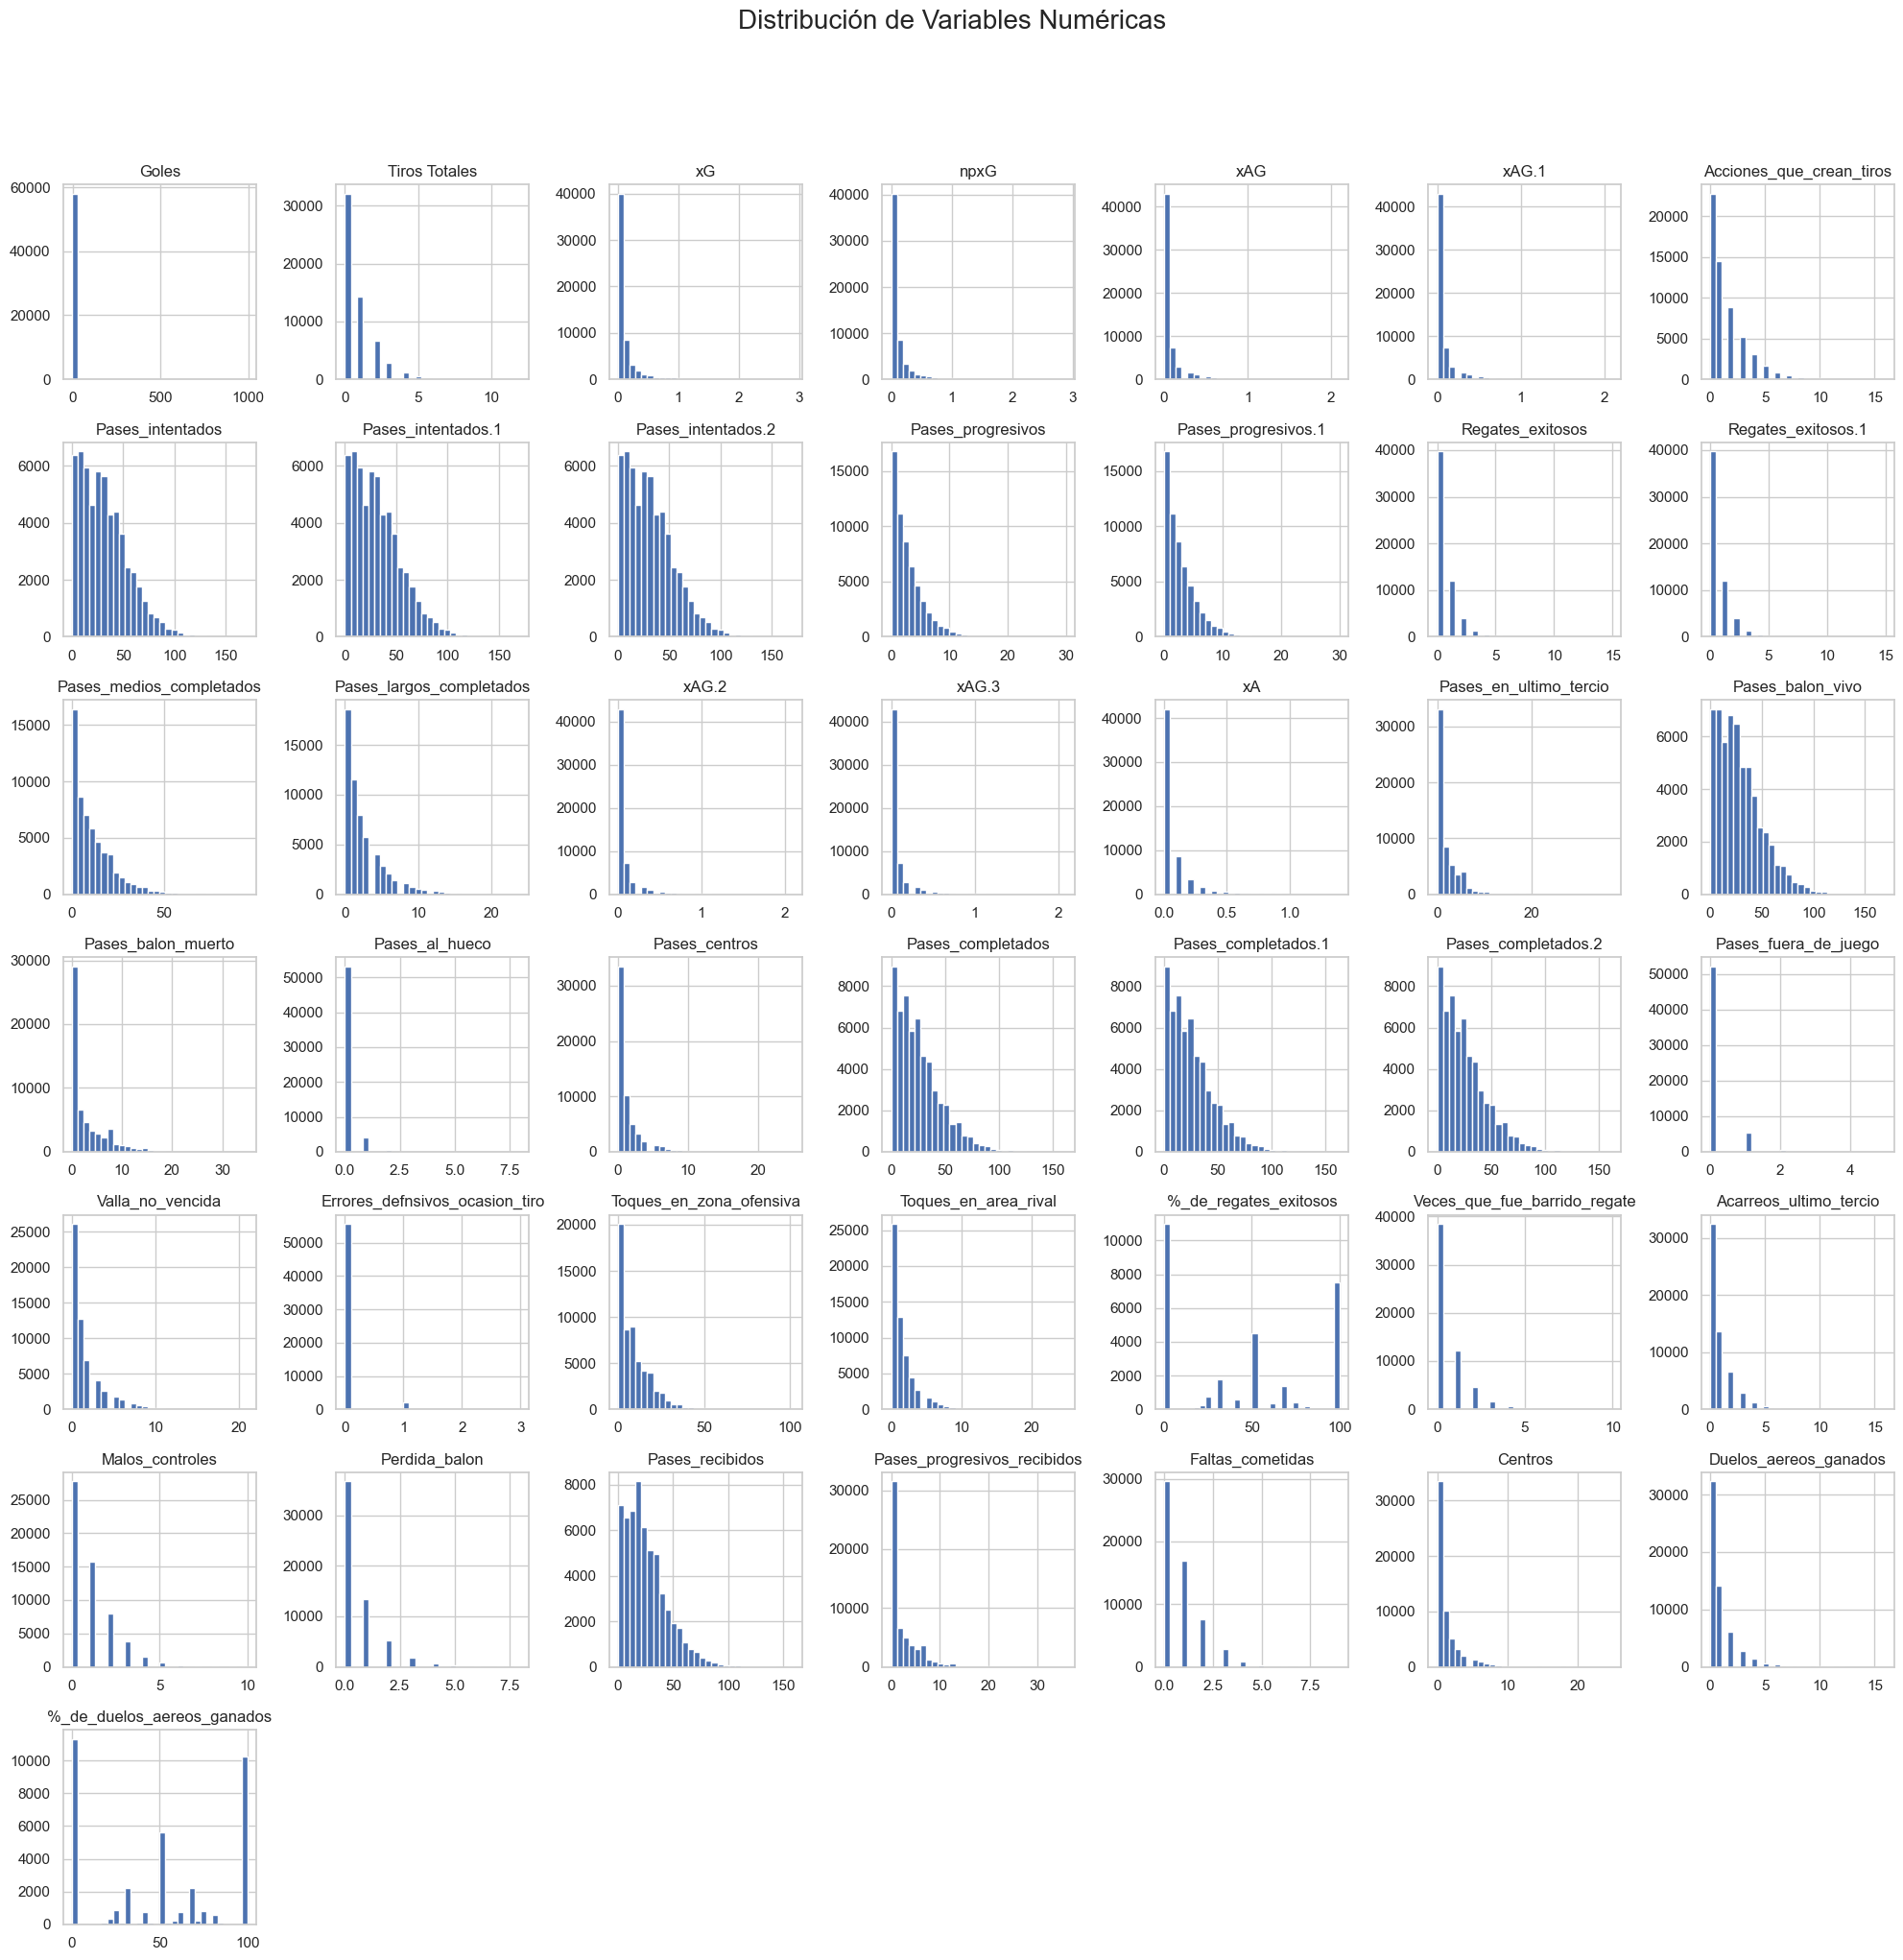

In [23]:
# Histogramas para atributos numéricos

fig = plt.figure(figsize=(20, 20))
df[num_cols].hist(bins=30, figsize=(20, 20))
plt.suptitle("Distribución de Variables Numéricas", fontsize=20, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

Las distribuciones de las variables numéricas muestran que la mayoría de los valores están muy concentrados en cero y solo unos pocos casos alcanzan cifras altas, lo que genera una fuerte asimetría hacia la derecha. Esto ocurre principalmente en las métricas ofensivas como goles, tiros, goles esperados, asistencias esperadas y centros. 

En contraste, variables relacionadas con pases y toques presentan mayor dispersión aunque también con sesgo hacia valores bajos. Finalmente, las variables expresadas en porcentaje, como éxito en regates o duelos aéreos, muestran una distribución más equilibrada en todo el rango de valores. En conjunto, los datos reflejan la realidad del fútbol: muchos jugadores participan poco en métricas destacadas y unos pocos concentran el rendimiento, lo que explica la gran cantidad de valores atípicos observados.

2.1 Relciones con Variable Objetivo

In [36]:

def parse_market_value(val):
    try:
        if pd.isna(val):
            return np.nan
        val = str(val).replace("€", "").replace(",", "").strip().lower()

        if val in ["-", "", "nan", "none", "error"]:
            return np.nan

        if val.endswith("m"):   # millones
            return float(val[:-1]) * 1e6
        elif val.endswith("k"): # miles
            return float(val[:-1]) * 1e3
        else:                   # número plano
            return float(val)
    except:
        return np.nan

# Aplicar al DataFrame
df["market_value_num"] = df["market_value"].apply(parse_market_value)

# Escalamos en millones para visualización
df["market_value_millions"] = df["market_value_num"] / 1e6

print(df[["market_value", "market_value_num", "market_value_millions"]].head())


  market_value  market_value_num  market_value_millions
0      €50.00m      5.000000e+07                   50.0
1      €50.00m      5.000000e+07                   50.0
2            -               NaN                    NaN
3    €1000.00m      1.000000e+09                 1000.0
4      €45.00m      4.500000e+07                   45.0


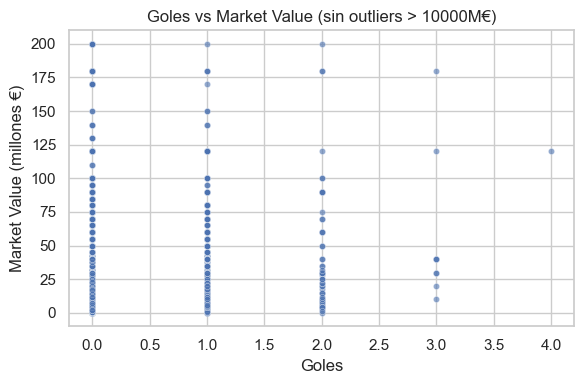

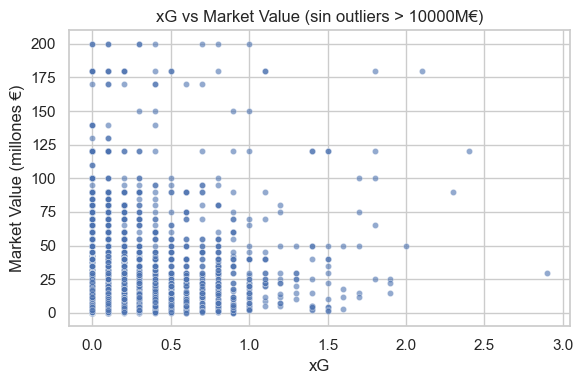

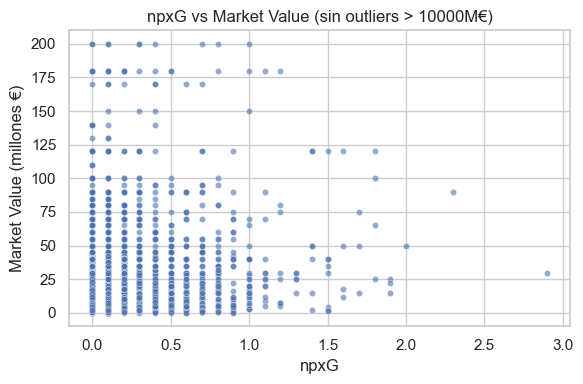

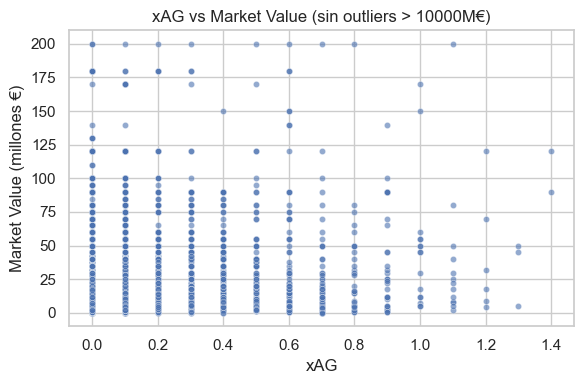

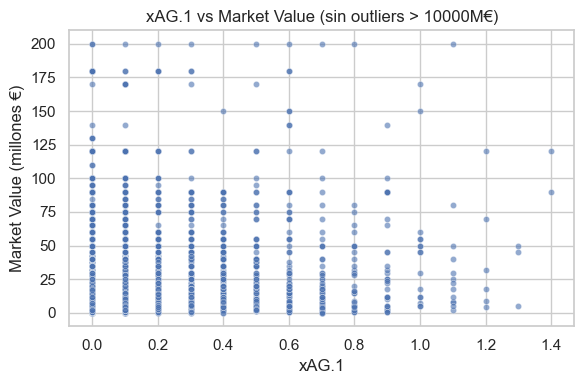

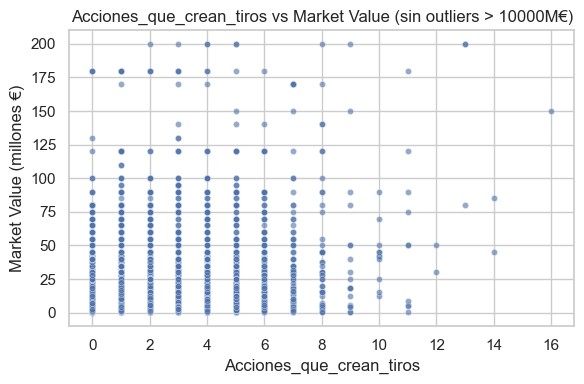

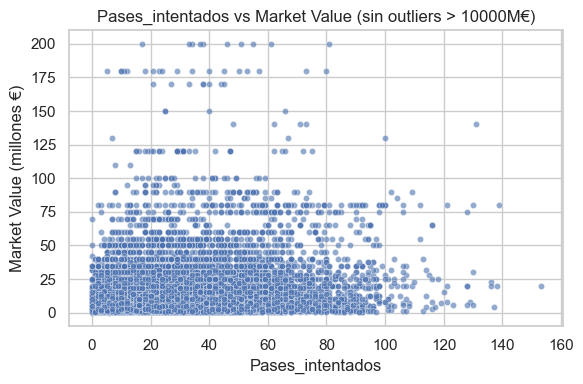

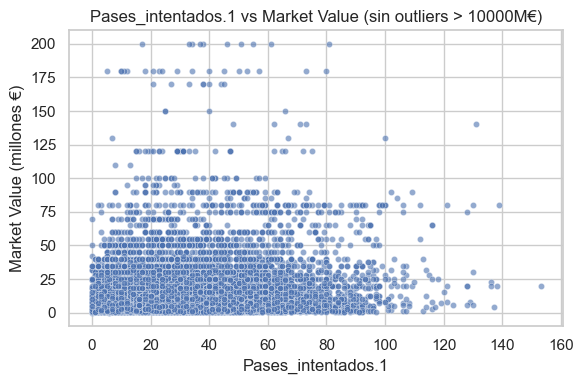

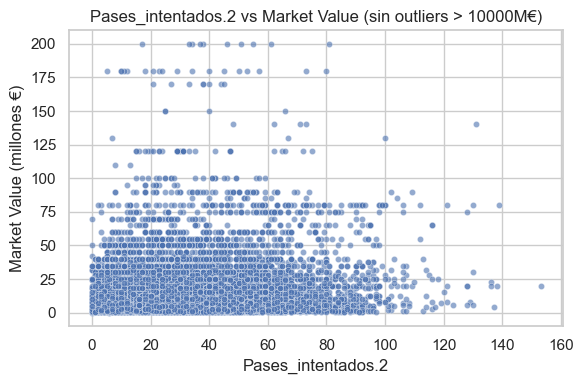

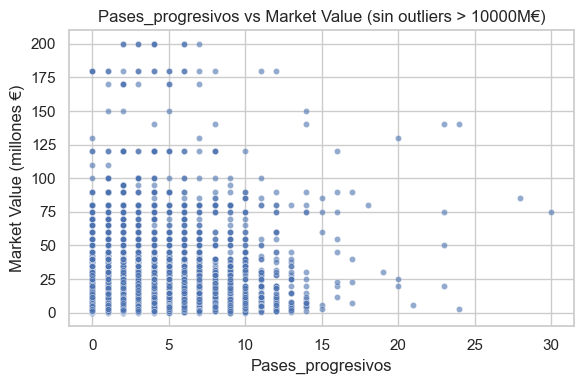

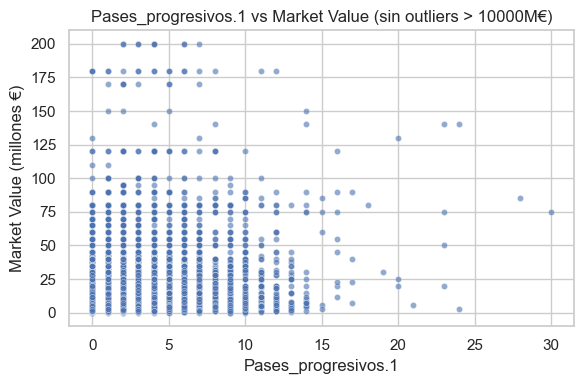

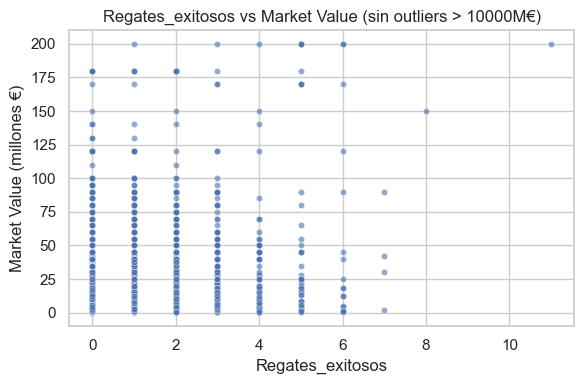

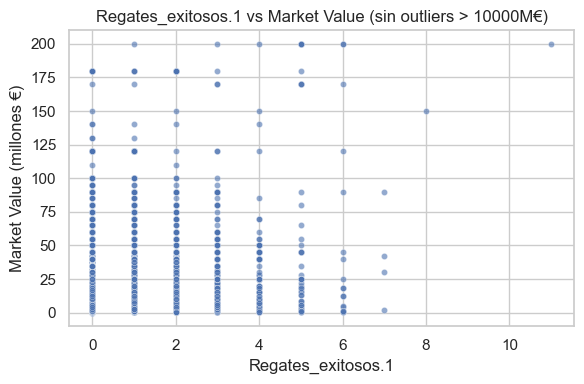

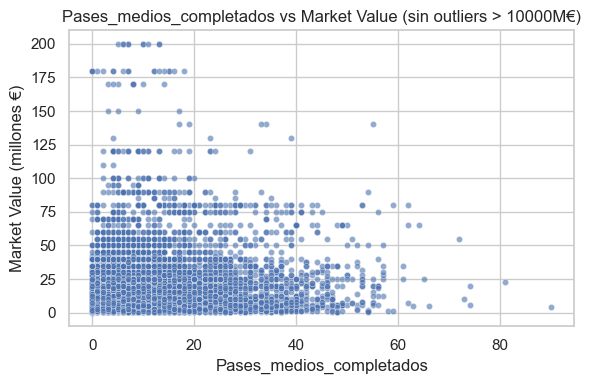

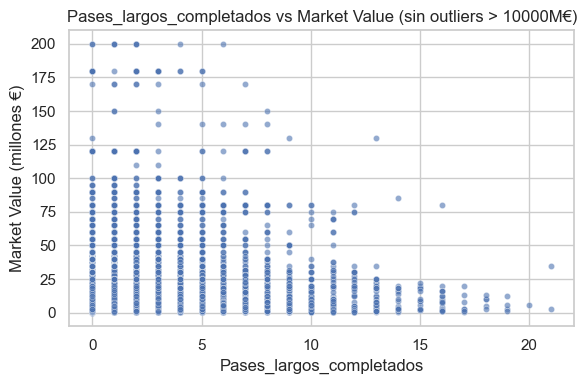

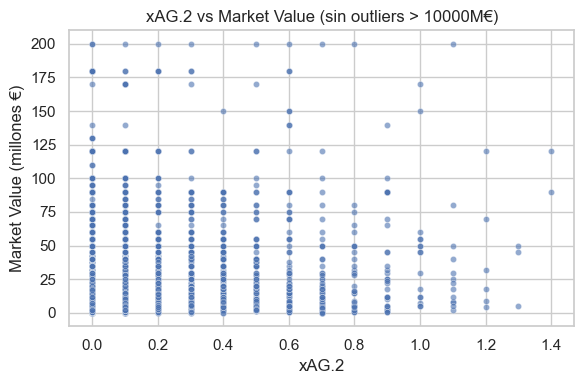

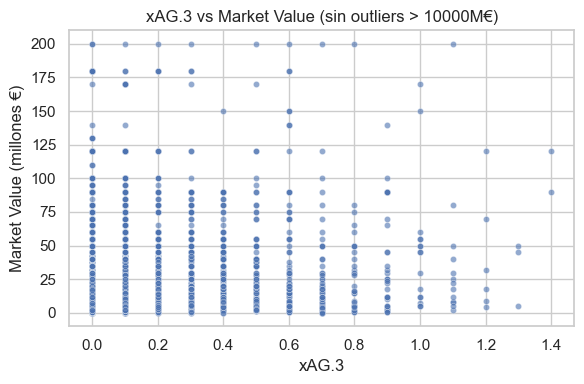

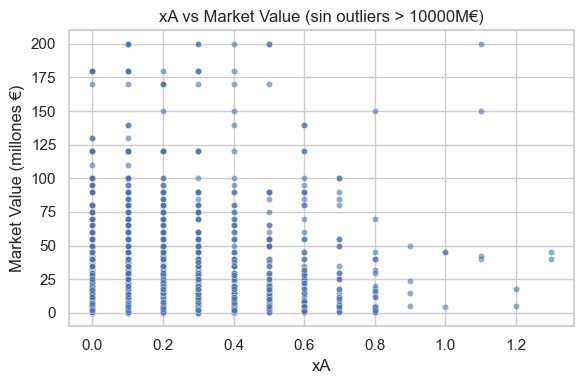

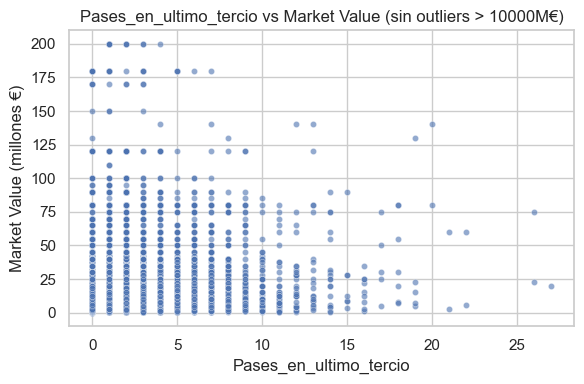

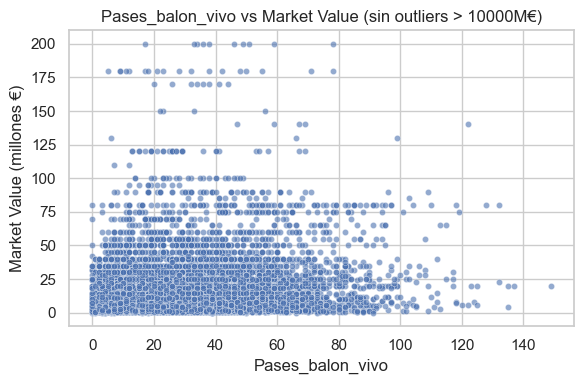

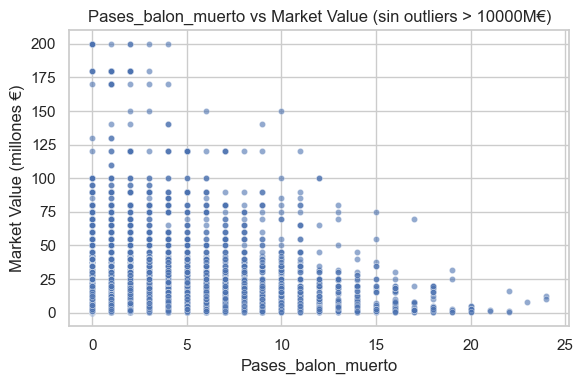

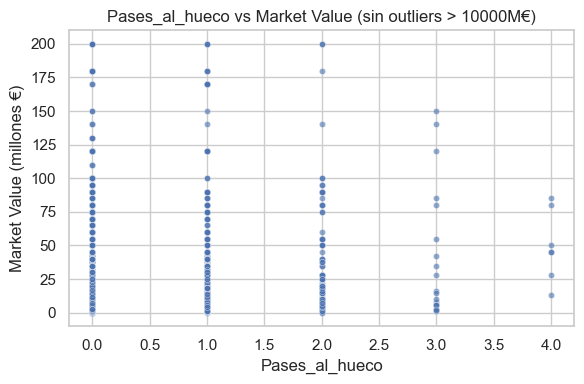

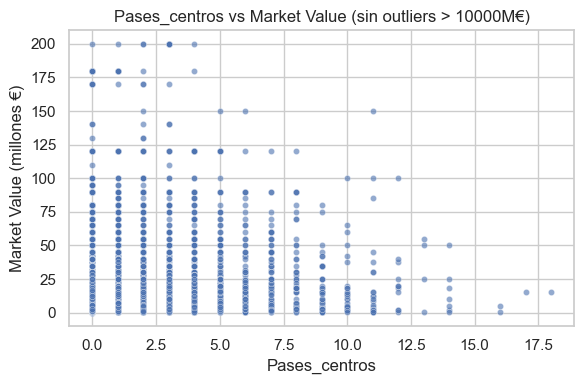

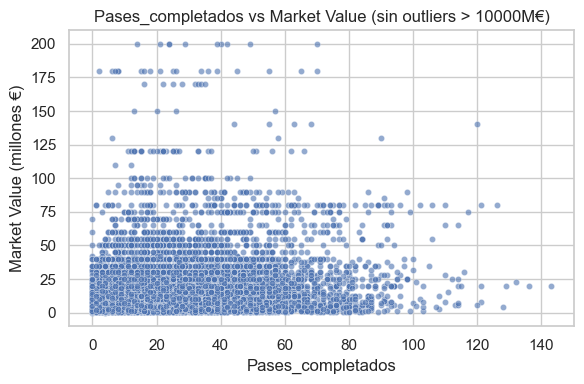

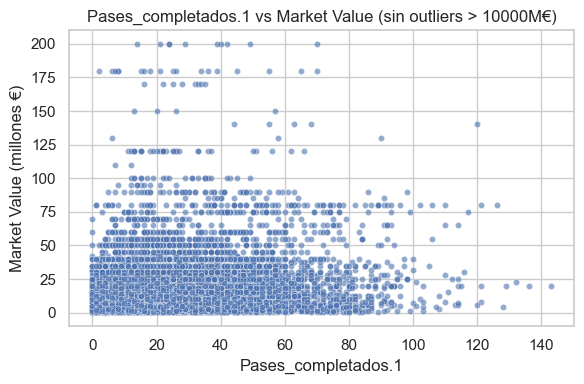

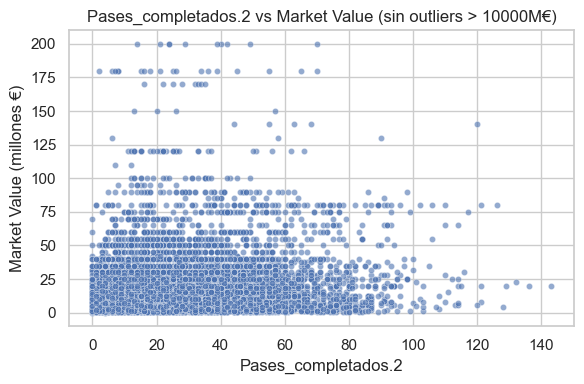

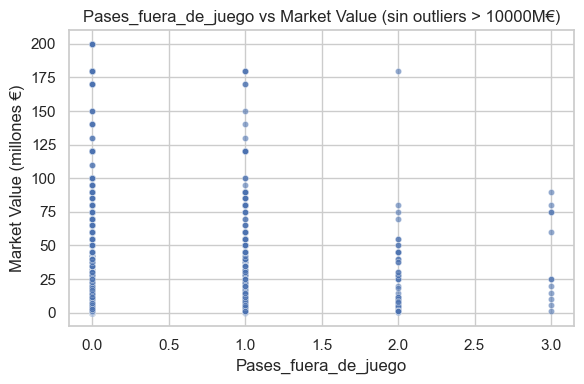

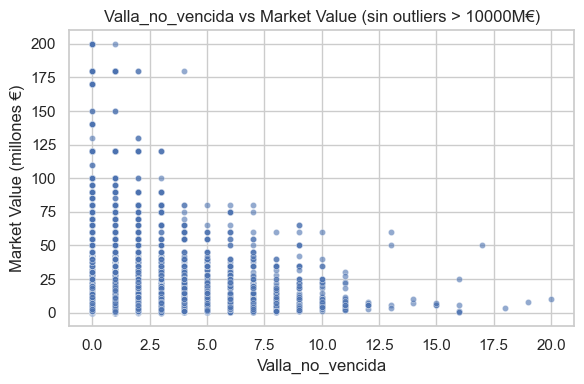

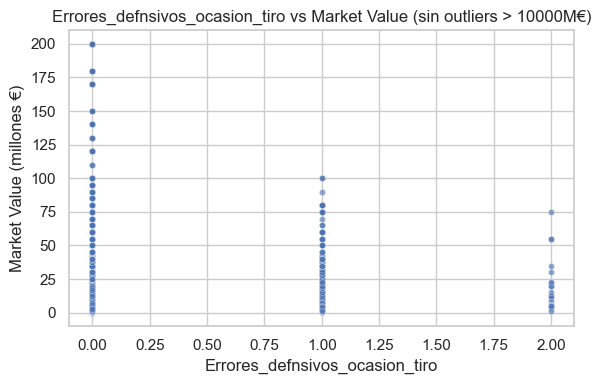

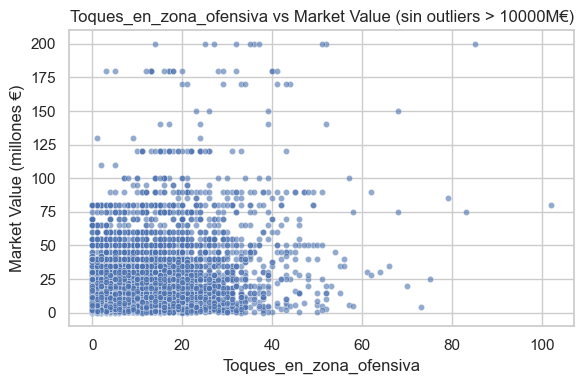

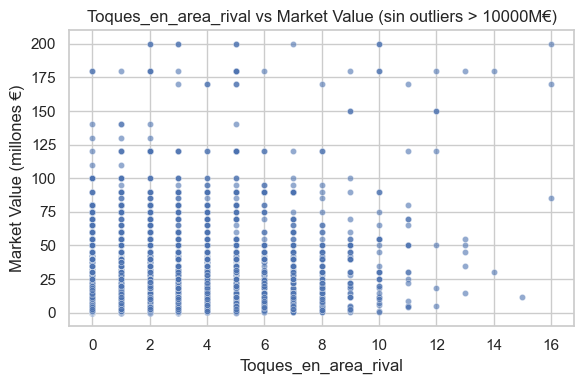

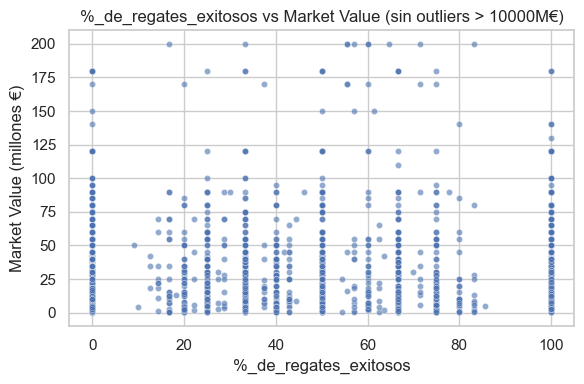

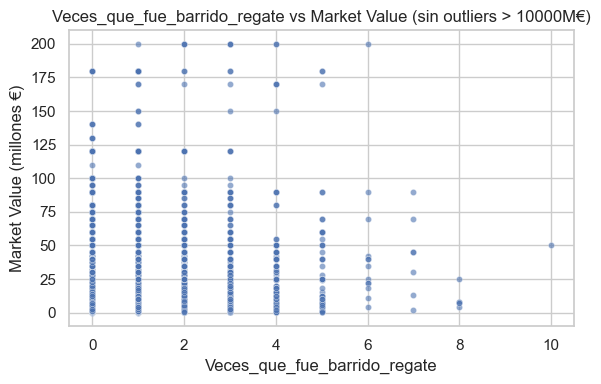

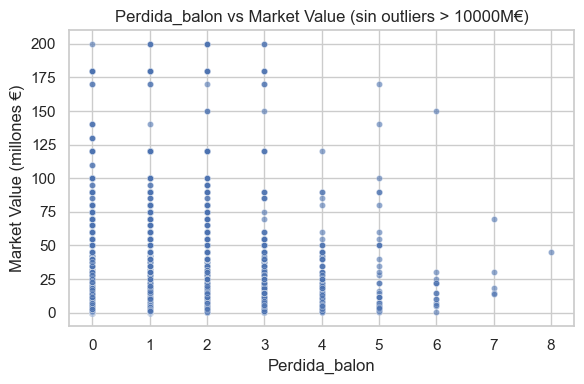

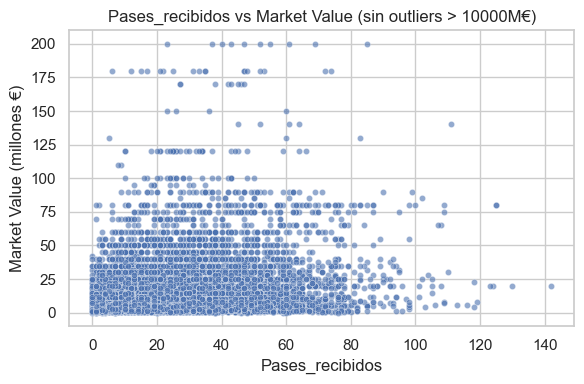

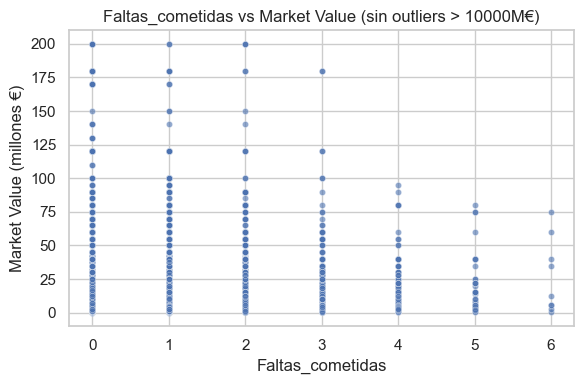

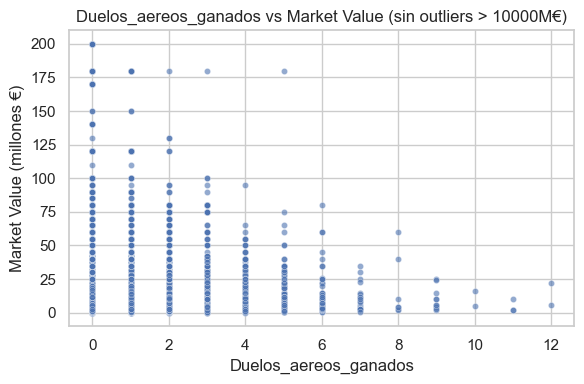

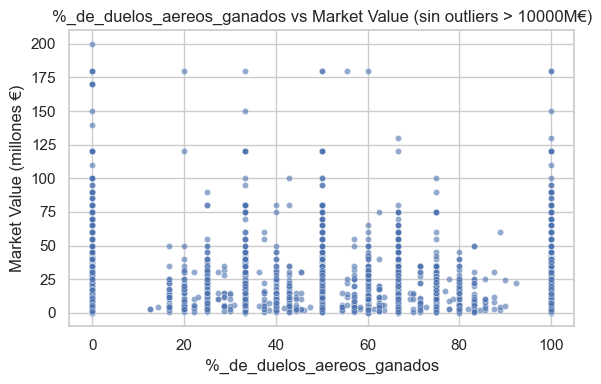

In [42]:
# Filtrar: eliminar valores de market_value_millions mayores a 10000
df_filtrado = df[df["market_value_millions"] < 6000]

# Graficar scatterplots de cada variable numérica vs market_value_millions
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(
        data=df_filtrado.sample(frac=0.2, random_state=42), 
        x=col, 
        y="market_value_millions",
        s=20, alpha=0.6
    )
    plt.title(f"{col} vs Market Value (sin outliers > 10000M€)")
    plt.xlabel(col)
    plt.ylabel("Market Value (millones €)")
    plt.tight_layout()
    plt.show()


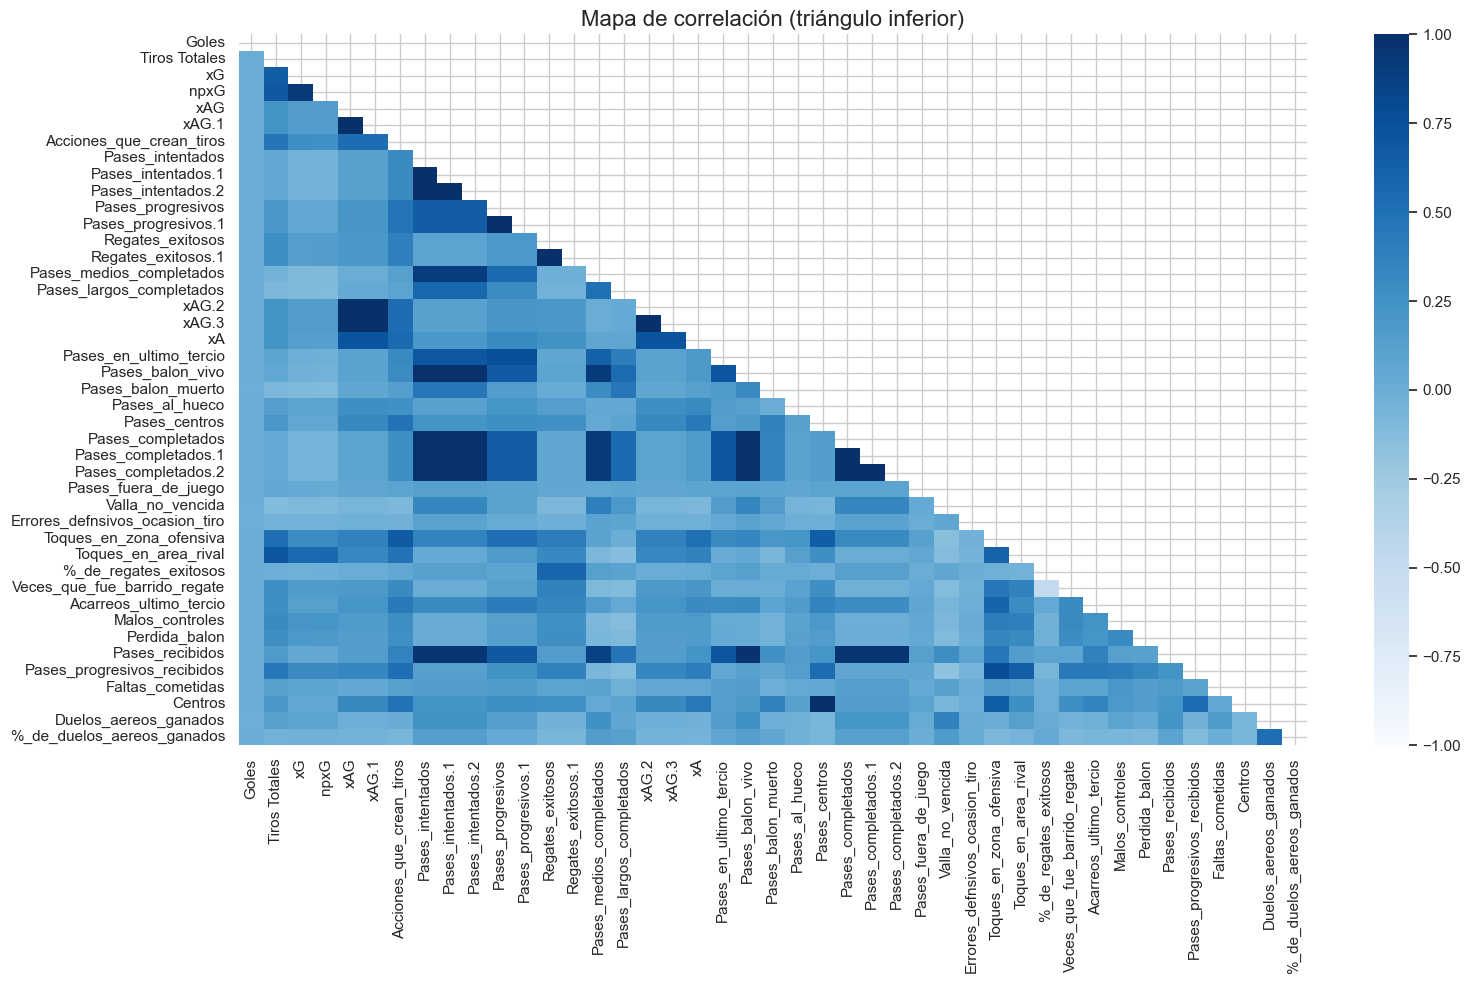

                   Variable_1                Variable_2  Correlación
732         Pases_completados       Pases_completados.1     1.000000
552                     xAG.2                     xAG.3     1.000000
173                       xAG                     xAG.2     1.000000
174                       xAG                     xAG.3     1.000000
210                     xAG.1                     xAG.2     1.000000
211                     xAG.1                     xAG.3     1.000000
273          Pases_intentados        Pases_intentados.1     1.000000
274          Pases_intentados        Pases_intentados.2     1.000000
162                       xAG                     xAG.1     1.000000
733         Pases_completados       Pases_completados.2     1.000000
438          Regates_exitosos        Regates_exitosos.1     1.000000
375         Pases_progresivos       Pases_progresivos.1     1.000000
750       Pases_completados.1       Pases_completados.2     1.000000
308        Pases_intentados.1     

In [29]:
corr = df[num_cols].corr()
plt.figure(figsize=(16,10))
mask = np.triu(np.ones_like(corr, dtype=bool))  # oculta triángulo superior
sns.heatmap(corr, mask=mask, cmap="Blues", vmin=-1, vmax=1, cbar=True)
plt.title("Mapa de correlación (triángulo inferior)", fontsize=16)
plt.tight_layout()
plt.show()

high_corr = (
    corr.where(~np.tril(np.ones(corr.shape)).astype(bool))  
    .stack()  # convertimos a pares (series)
    .reset_index()
)


high_corr.columns = ["Variable_1", "Variable_2", "Correlación"]

# Filtramos solo correlaciones fuertes (>0.8 o <-0.8)
high_corr = high_corr[high_corr["Correlación"].abs() > 0.8]

# Mostramos
print(high_corr.sort_values(by="Correlación", ascending=False))

Con respecto al gráfico anterior se puede determinar que los siguientes conjuntos de datos tienen una correlación entre si de 1:

- xAG, xAG.1, xAG.2, xAG.3
- Pases_intentados, Pases_intentados.1, Pases_intentados.2
- Pases_completados, Pases_completados.1, Pases_completados.2
- Regates_exitosos, Regates_exitosos.1

Otras variables fuertemente correlacionadas entre si pueden ser:
- Pases_intentados, Pases_balon_vivo 
- Pases_balon_vivo, Pases_completados 
- Pases_intentados, Pases_completados
- Pases_balon_vivo, Pases_recibidos
- Pases_completados, Pases_recibidos 
- Pases_intentados, Pases_recibidos 
- Pases_medios_completados, Pases_completados
- Pases_medios_completados, Pases_balon_vivo 
- Pases_medios_completados, Pases_medio_recibidos
- Pases_intentados, Pases_medios_completados 
- xG, npxG

Viendo esto se puede eliminar varias variables debido a la alta correlación que tienen entre si dejando como posibles caracteristicas para el modelo a:

- Goles
- Tiros Totales
- xG 
- xAG
- Acciones_que_crean_tiros
- Pases_progresivos
- Regates_exitosos
- Pases_largos_completados
- Pases_en_ultimo_tercio
- Pases_balon_muerto
- Pases_al_hueco
- Pases_centros
- Valla_no_vencida
- Errores_defnsivos_ocasion_tiro
- Toques_en_zona_ofensiva
- Toques_en_area_rival
- %_de_regates_exitosos
- Veces_que_fue_barrido_regate
- Acarreos_ultimo_tercio
- Malos_controles
- Perdida_balon
- Pases_progresivos_recibidos
- Faltas_cometidas
- Duelos_aereos_ganados
- %_de_duelos_aereos_ganados



In [45]:

# Número de categorías que quieres mostrar (ej. top 15)
top_n = 15

# Tomar las top categorías
top_cats = df["Nacionalidad"].value_counts().nlargest(top_n)

# Crear un DataFrame nuevo con top categorías y resto como "Otros"
df_plot = df.copy()
df_plot["Nacionalidad_simplificada"] = df_plot["Nacionalidad"].apply(
    lambda x: x if x in top_cats.index else "Otros"
)

plt.figure(figsize=(10,5))
sns.countplot(
    data=df_plot, 
    x="Nacionalidad_simplificada", 
    order=df_plot["Nacionalidad_simplificada"].value_counts().index
)
plt.title("Frecuencia de categorías para Nacionalidad (Top 15 + Otros)")
plt.xticks(rotation=45)
plt.ylabel("Frecuencia")
plt.xlabel("Nacionalidad")
plt.tight_layout()
plt.show()


1.2 Calidad de Datos

## 5. Limpieza de datos
Se realizaron las siguientes acciones:
1. Eliminación de duplicados.
2. Imputación de valores nulos:
   - Para variables numéricas: **mediana**.
   - Para variables categóricas: **valor más frecuente**.
3. Verificación final para asegurar que no queden valores nulos.


In [25]:
# ====================================
# 5. Limpieza de datos
# ====================================

# a) Eliminar duplicados
df = df.drop_duplicates()

# b) Imputar valores nulos
# Numéricas → Mediana
num_imputer = SimpleImputer(strategy="median")
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Categóricas → Valor más frecuente
cat_imputer = SimpleImputer(strategy="most_frequent")
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# c) Verificar limpieza
print("\nValores nulos tras limpieza:")
print(df.isnull().sum().sum())

print(f"\nTamaño final del dataset: {df.shape}")



Valores nulos tras limpieza:
0

Tamaño final del dataset: (47451, 50)


## 6. Guardado del dataset limpio
El dataset limpio se guardó en `dataset_limpio.csv` para su uso en etapas posteriores.

In [26]:
# ====================================
# 6. Guardar dataset limpio
# ====================================
df.to_csv("dataset_limpio.csv", index=False)
print("\nDataset limpio guardado como 'dataset_limpio.csv'.")



Dataset limpio guardado como 'dataset_limpio.csv'.


## Conclusión
El modelo se entrenará usando el archivo limpio **`dataset_limpio.csv`**, porque es la versión del dataset que:

- Ya no tiene valores nulos ni duplicados.  
- Tiene un formato consistente y adecuado para los algoritmos.  
- Permite reproducir resultados y mantener trazabilidad del flujo de datos.  


## 8. Separación de Variables (X e y)

En esta etapa se define la **variable objetivo (`y`)** y el conjunto de variables predictoras (`X`).  
Esto es un paso clave para entrenar cualquier modelo, ya que:

- `X` contiene todas las características o **atributos** utilizados para hacer predicciones.  
- `y` es la **variable de salida** que queremos estimar (en este caso, `market_value`).  

In [29]:
# ====================================
# 8. Separación de Variables
# ====================================
# Ajusta el nombre de la columna target según corresponda
target = "market_value"

X = df.drop(columns=[target])
y = df[target]

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")


X shape: (47451, 49)
y shape: (47451,)


## 9. División en Entrenamiento y Prueba

Se divide el dataset en dos subconjuntos:  
- **Entrenamiento (80%)**: Datos usados para ajustar los parámetros del modelo.  
- **Prueba (20%)**: Datos reservados para evaluar el rendimiento real del modelo sobre información no vista.  

Esto ayuda a **evitar sobreajuste (overfitting)** y medir la capacidad de generalización del modelo.


In [30]:
# ====================================
# 9. División de Datos
# ====================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Train: {X_train.shape}, Test: {X_test.shape}")


Train: (37960, 49), Test: (9491, 49)


## 10. Pipeline de Preprocesamiento

Se construye un **pipeline** que aplicará automáticamente las transformaciones necesarias antes de entrenar el modelo:

- **Variables numéricas**: Estandarización usando `StandardScaler`.  
- **Variables categóricas**: Codificación con `OneHotEncoder` (manejo de categorías no vistas con `ignore`).  

Esto asegura:
- Que todas las columnas estén en una escala adecuada.  
- Que el modelo pueda procesar categorías de texto sin errores.  
- Que el preprocesamiento sea **reproducible y fácil de aplicar** tanto a los datos de entrenamiento como a los de prueba.

Al dejar el pipeline armado, se facilita la integración con algoritmos de machine learning sin pasos manuales extra.


In [31]:
# ====================================
# 10. Pipeline de Preprocesamiento
# ====================================

# Pipelines internos
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# ColumnTransformer final
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)

print("Pipeline de preprocesamiento creado.")


Pipeline de preprocesamiento creado.
